In [0]:
# Description: This program uses a RNN called LSTM 
#              to predict the closing stock price of a corporation.  

In [0]:
#import the libraries
import math 
import pandas_datareader as web
import numpy as np 
import pandas as pd  
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
# Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-03-30')
# Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.994907
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.268970
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.838169
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.380054
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.296970
...,...,...,...,...,...,...
2020-03-24,247.690002,234.300003,236.360001,246.880005,71882800.0,246.880005
2020-03-25,258.250000,244.300003,250.750000,245.520004,75900500.0,245.520004
2020-03-26,258.679993,246.360001,246.520004,258.440002,63021800.0,258.440002


In [4]:
# Get the number of rows and col in the dataset
df.shape

(2073, 6)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


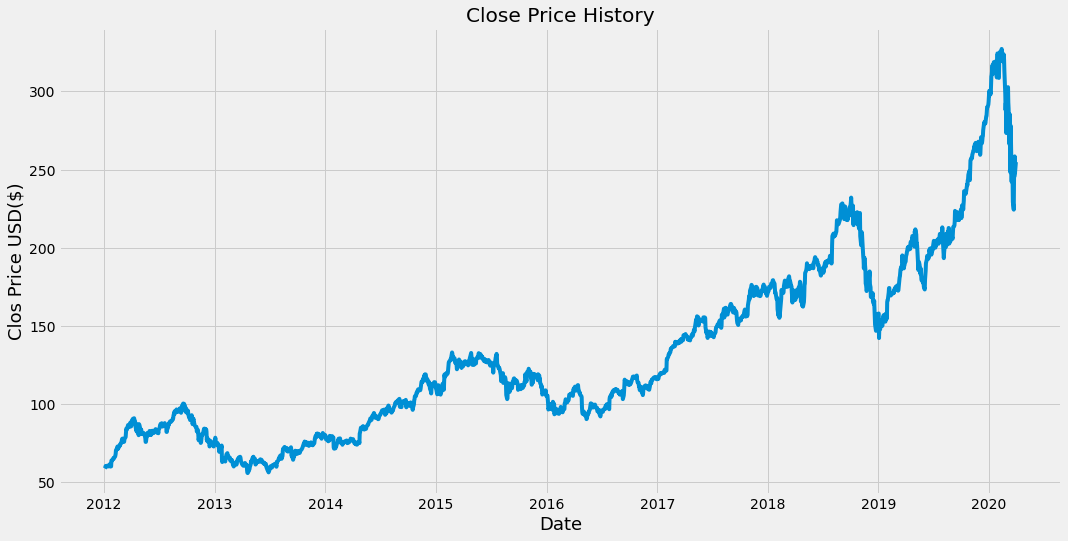

In [5]:
#Visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Clos Price USD($)', fontsize=18)
plt.show()

In [6]:
# Create a new df with only 'Close' col
data = df.filter(['Close'])
# Convert the df to numpy arr
dataset = data.values
# Get the no of rows of training data
training_data_len = math.ceil(len(dataset)*0.8)

training_data_len

1659

In [7]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.74665632],
       [0.70723259],
       [0.73328171]])

In [8]:
# Create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
# Split data into x_train and y_train
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01

In [0]:
# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [11]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1599, 60, 1)

In [0]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [21]:
# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
1599/1599 [==============================] - 99s 62ms/step - loss: 6.6901e-04
Epoch 2/10
1599/1599 [==============================] - 99s 62ms/step - loss: 2.2656e-04
Epoch 3/10
1599/1599 [==============================] - 99s 62ms/step - loss: 1.5253e-04
Epoch 4/10
1599/1599 [==============================] - 98s 62ms/step - loss: 1.5171e-04
Epoch 5/10
1599/1599 [==============================] - 99s 62ms/step - loss: 1.4805e-04
Epoch 6/10
1599/1599 [==============================] - 102s 64ms/step - loss: 1.1664e-04
Epoch 7/10
1599/1599 [==============================] - 100s 63ms/step - loss: 1.1285e-04
Epoch 8/10
1599/1599 [==============================] - 100s 62ms/step - loss: 1.0487e-04
Epoch 9/10
1599/1599 [==============================] - 100s 63ms/step - loss: 9.7119e-05
Epoch 10/10
1599/1599 [==============================] - 101s 63ms/step - loss: 9.0155e-05


In [0]:
# Create the testing dataset with a new  array containing scaled values from index 1599 to 2073
test_data = scaled_data[training_data_len-60:, :]

# Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
# Convert the data to numpy arr
x_test = np.array(x_test)
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [34]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

(414, 1)

In [35]:
# Calculate RMSE
rmse = np.sqrt( np.mean( predictions-y_test )**2 )
rmse

1.3620498583512606

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


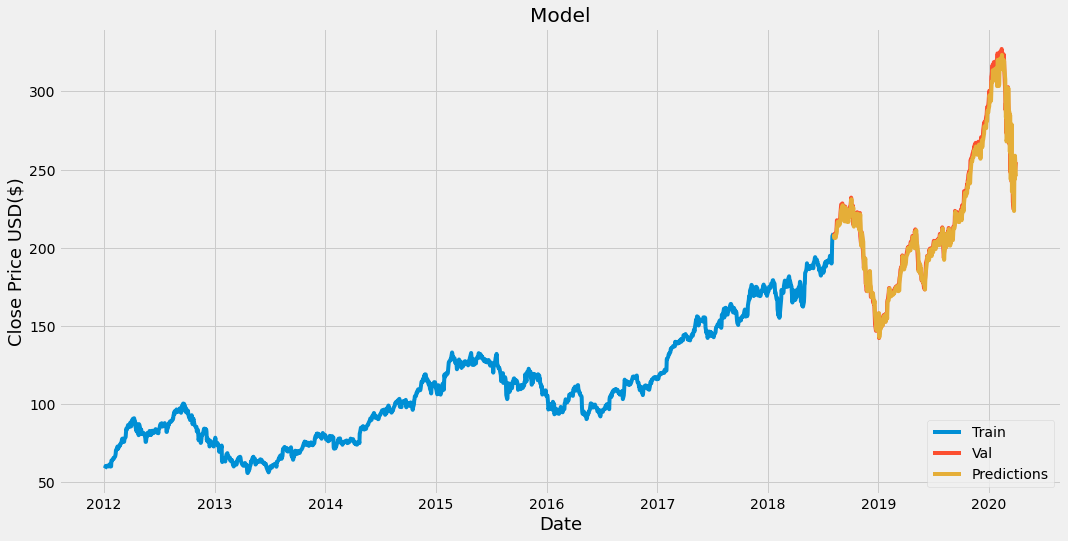

In [36]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [37]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-08-07,207.110001,208.555756
2018-08-08,207.250000,206.287354
2018-08-09,208.880005,206.458389
2018-08-10,207.529999,207.941238
2018-08-13,208.869995,206.345566
...,...,...
2020-03-24,246.880005,223.499557
2020-03-25,245.520004,247.525177
2020-03-26,258.440002,243.798080


In [41]:
# Get the quote
apple_quote = web. DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-03-30' )
# Create new df
new_df = apple_quote.filter(['Close'])
# Get the last 60 days closing price val & convert the df to an array
last_60_days = new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
# Create an empty list
X_test = []
# Append the past 60 days
X_test.append(last_60_days_scaled)
# Convert the X_test dataset to a numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
# undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


[[254.7591]]


In [43]:
# Get the quote
apple_quote2 = web. DataReader('AAPL', data_source='yahoo', start='2020-03-31', end='2020-03-31' )
print(apple_quote2['Close'])

Date
2020-03-30    254.809998
Name: Close, dtype: float64
